In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
def calc_auc(trues, scores):
    ps = len([x for x in trues if x == 1])
    ns = len([x for x in trues if x == 0])

    ranks = list(zip(trues, scores))
    ranks = sorted(ranks, key=lambda x:x[1])
    ranks = [e+(i+1,) for i, e in enumerate(ranks)]

    duplicates = {}
    for label, score, rank in ranks:
        duplicates[score] = duplicates.get(score, 0) + 1

    dup_ranksum = {}
    for label, score, rank in ranks:
        if duplicates[score] > 1:
            dup_ranksum[score] = dup_ranksum.get(score, 0) + rank

    for score in dup_ranksum:
        dup_ranksum[score] = dup_ranksum[score] / duplicates[score]

    auc = 0
    for label, score, rank in ranks:
        if label == 1:
            if score in dup_ranksum:
                auc += dup_ranksum[score]
            else:
                auc += rank

    auc = (auc - ps*(ps+1)/2) / (ps * ns)
    return auc

In [3]:
trues = [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
scores = [.9, .8, .7, .6, .55, .54, .53, .52, .51, .505, .4, .39, .38, .37, .36, .35, .34, .33, .3, .1]

print('{0}: {1}'.format("the function calc_auc", calc_auc(trues, scores)))
print('{0}: {1}'.format("sklearn roc_auc_score", roc_auc_score(trues, scores)))

the function calc_auc: 0.68
sklearn roc_auc_score: 0.6799999999999999


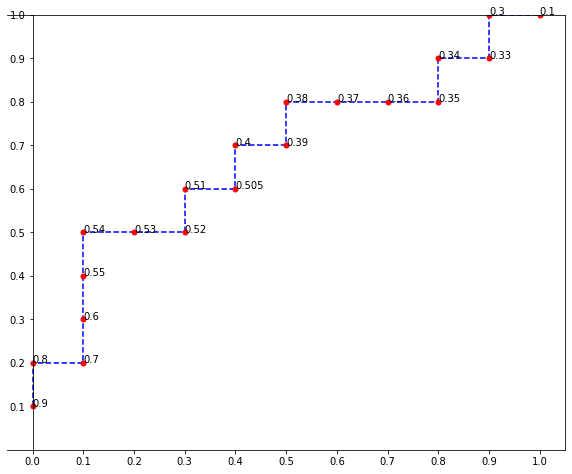

In [4]:
ps = len([x for x in trues if x == 1])
ns = len([x for x in trues if x == 0])

g = list(zip(trues, scores))

tpr = [len([x[0] for x in g if x[0]==1 and x[1]>=y])/ps for y in scores]
fpr = [len([x[0] for x in g if x[0]==0 and x[1]>=y])/ns for y in scores]

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))

ax.set_ylim(0)
ax.set_yticks(np.linspace(0.1, 1, 10))
ax.set_xticks(np.linspace(0, 1, 11))

ax.plot(fpr, tpr, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markeredgecolor='red', markersize=5)

for i, e in enumerate(scores):
    ax.annotate(e, (fpr[i], tpr[i]))

plt.show()